In [9]:
!git clone https://github.com/salesforce/BLIP
%cd BLIP

c:\Users\micha\Documents\Programming\ML\LEGO_StableDiffusion\Preprocessing\BLIP


fatal: destination path 'BLIP' already exists and is not an empty directory.


In [10]:
#if directory already exists:
%cd BLIP

[WinError 2] The system cannot find the file specified: 'BLIP'
c:\Users\micha\Documents\Programming\ML\LEGO_StableDiffusion\Preprocessing\BLIP


In [11]:
!pip3 install transformers==4.15.0 timm==0.4.12 fairscale==0.4.4

In [12]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [13]:
from PIL import Image
import torch
from torchvision import transforms
from torchvision.transforms.functional import InterpolationMode

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def load_demo_image(image_size,device, path):
    raw_image = Image.open(rf"{path}").convert('RGB')    
    transform = transforms.Compose([
        transforms.Resize((image_size,image_size),interpolation=InterpolationMode.BICUBIC),
        transforms.ToTensor(),
        transforms.Normalize((0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711))
        ]) 
    image = transform(raw_image).unsqueeze(0).to(device)   
    return image

In [14]:
import shutil
import os
from models.blip import blip_decoder

def generate_captioning(path):
    names = os.listdir(path)
    image_size = 384
    model_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_base_capfilt_large.pth'

    model = blip_decoder(pretrained=model_url, image_size=image_size, vit='base')
    model.eval()
    model = model.to(device)
    
    for name in names:
        try:
            image = load_demo_image(image_size=image_size, device=device, path=f"{path}/{name}")
            
            with torch.no_grad():
                caption = model.generate(image, sample=True, top_p=0.9, max_length=20, min_length=5) 
                with open("../Scraped_images/metadata.jsonl", "a+") as f:
                    line = f'"file_name": "{name}", "text": "{caption[0]}"'
                    shutil.copy(f"{path}/{name}", rf"..\Scraped_images\{name}")
                    f.write("{"+line+"}\n")
        except:
            print("Error", name)
        

In [4]:
generate_captioning("../../../databases/Lego_db")

reshape position embedding from 196 to 576
load checkpoint from https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_base_capfilt_large.pth


In [16]:
%cd ..

c:\Users\micha\Documents\Programming\ML\LEGO_StableDiffusion\Preprocessing


In [20]:
from datasets import load_dataset

dataset = load_dataset("imagefolder", data_dir="Scraped_images", split='train')

FileNotFoundError: Couldn't find a dataset script at c:\Users\micha\Documents\Programming\ML\LEGO_StableDiffusion\Preprocessing\imagefolder\imagefolder.py or any data file in the same directory. Couldn't find 'imagefolder' on the Hugging Face Hub either: FileNotFoundError: Couldn't find file at https://raw.githubusercontent.com/huggingface/datasets/master/datasets/imagefolder/imagefolder.py

In [22]:
dataset

Dataset({
    features: ['image', 'text'],
    num_rows: 2575
})

In [29]:
dataset[2499]['text']

"a lego helicopter that looks like it's about to be"

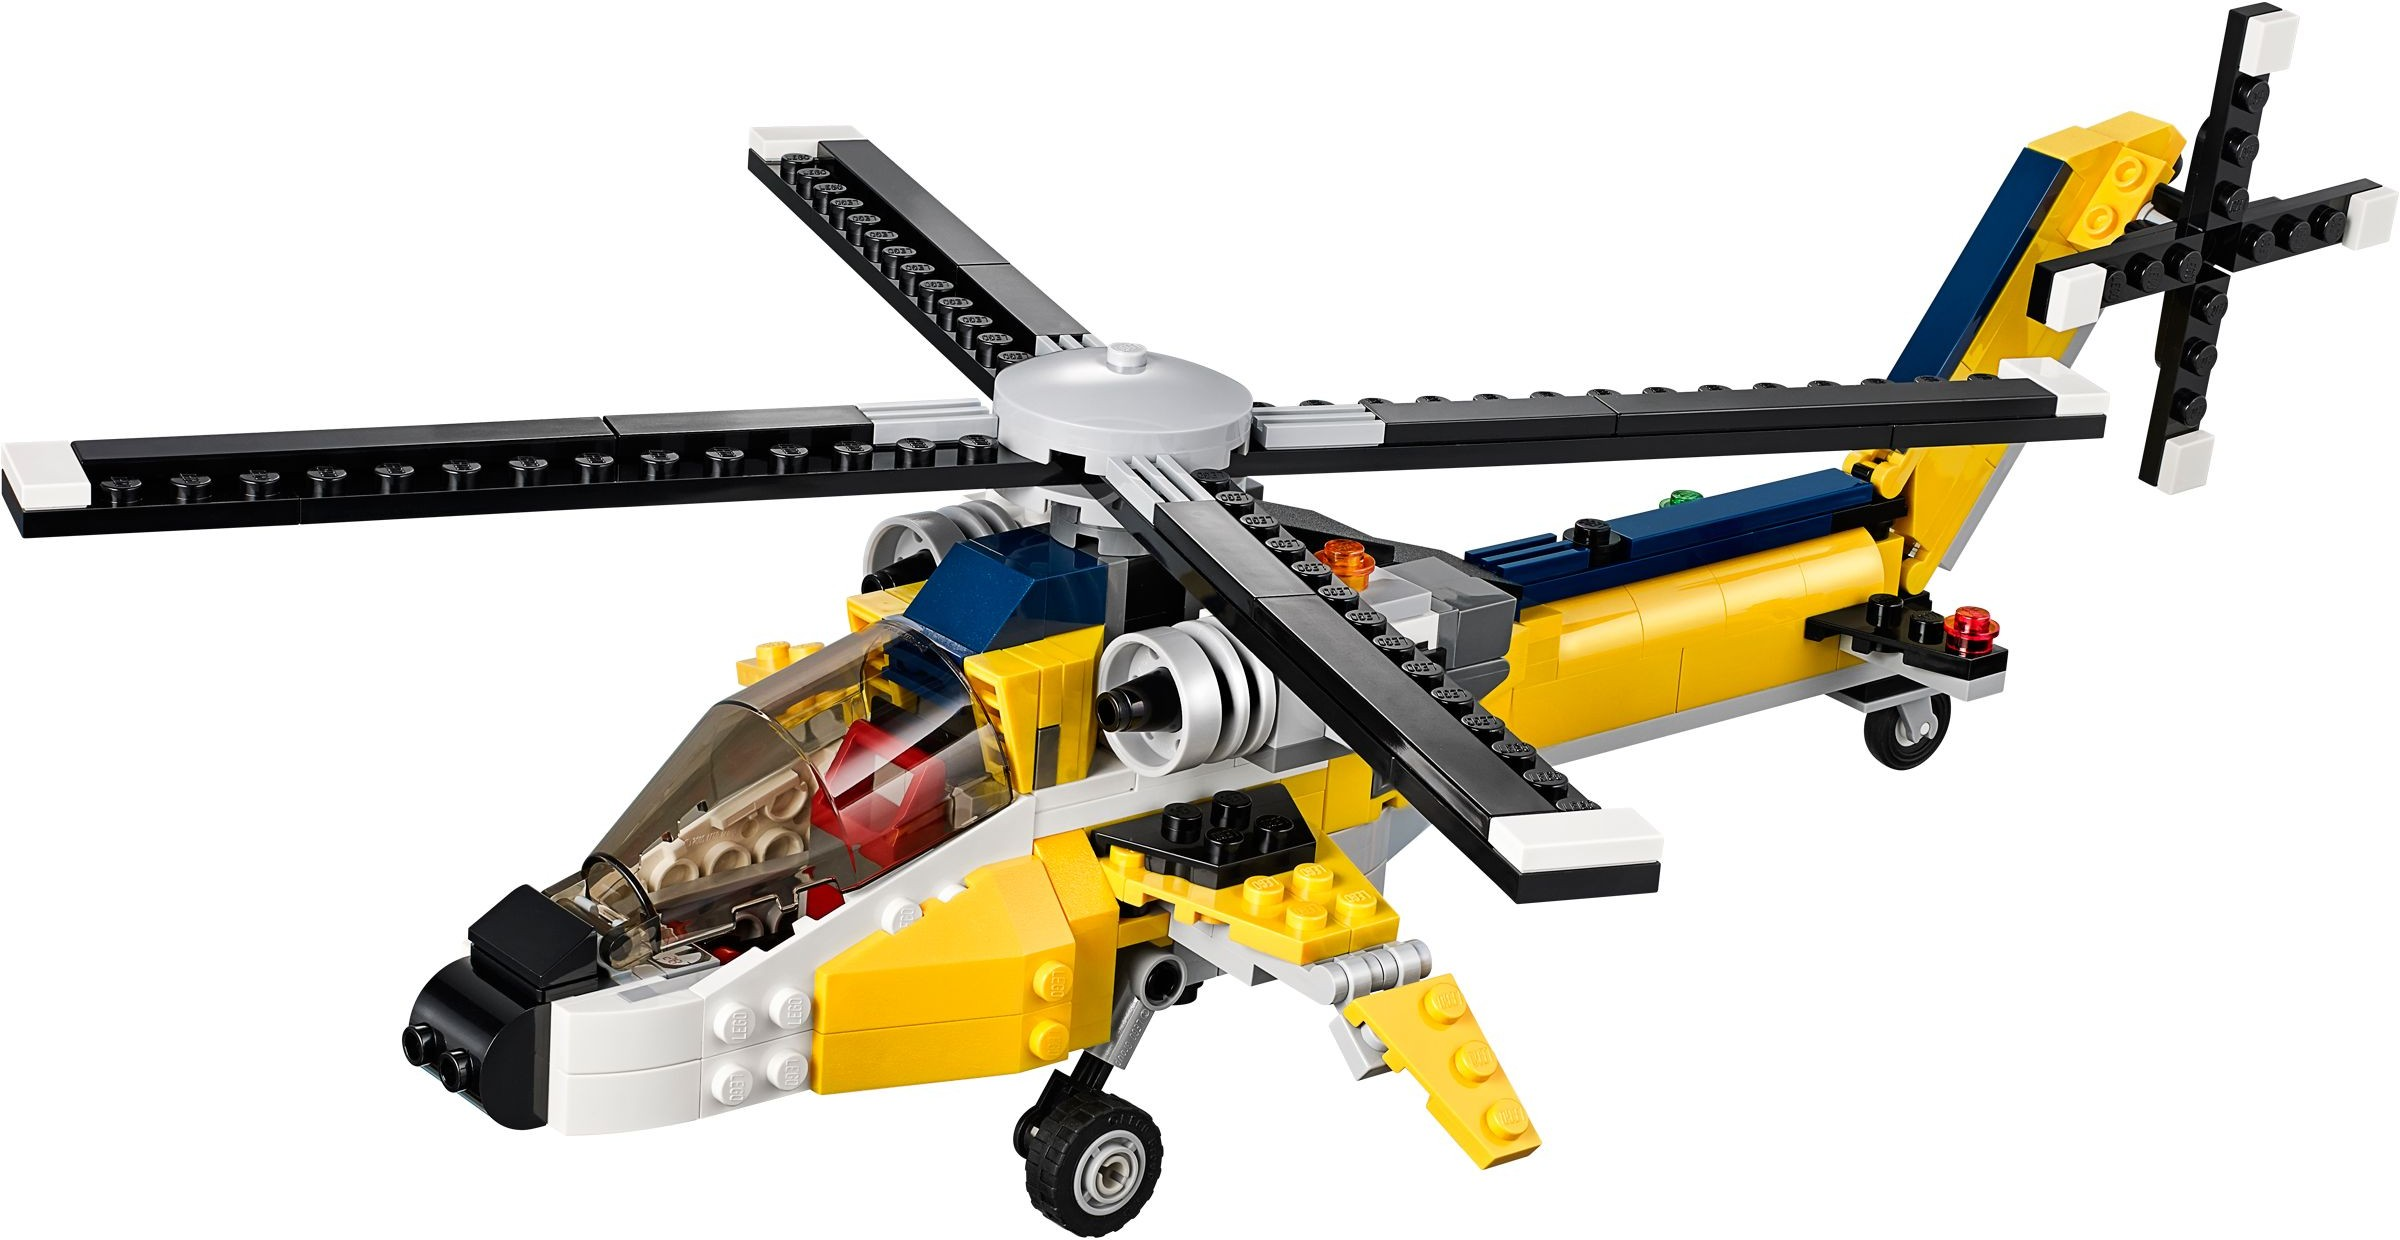

a lego helicopter that looks like it's about to be


In [30]:
display(dataset[2499]["image"])
print(dataset[2499]["text"])